Polar graphs can be a good way to represent cyclical data, such as traffic by day of week. In this post I take [stack overflow](http://stackoverflow.com) data and plot the usage of tags throughout the week. The method also adds errors to the matplotlib polar plot as a shaded region to help understand the variability in the data. The data is available [here](/data/daily-tag-counts.csv), originally from [the stack exchange data dump](https://archive.org/details/stackexchange).

[IPython notebook for this post](https://github.com/frankcleary/data-science-bytes/blob/master/content/daily-graphing.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('precision', 2)

DATAFILE = 'data/daily-tag-counts.csv'

In [2]:
daily_tag_counts = pd.read_csv(DATAFILE, index_col=0, parse_dates=0)
# only look at data from 2014
daily_tag_counts = daily_tag_counts['2014':]
daily_tag_counts.head(3)

,java,python,c++,pandas,javascript,sql,html,ios
date,,,,,,,,
2014-01-01,312,157,158,4,403,78,211,129
2014-01-02,620,298,217,12,701,233,361,261
2014-01-03,660,334,249,13,758,217,370,313


Group by the day of the week and calculate the mean of each day (0=Monday, 6=Sunday).

In [3]:
weekday_totals = daily_tag_counts.groupby(daily_tag_counts.index.weekday).mean()
weekday_totals.head(3)

,java,python,c++,pandas,javascript,sql,html,ios
0,753.19,375.86,265.33,16.61,812.00,273.78,395.89,318.67
1,809.03,413.25,288.47,19.83,901.44,299.22,441.19,349.11
2,815.19,415.14,289.76,20.46,918.62,317.49,450.32,347.97


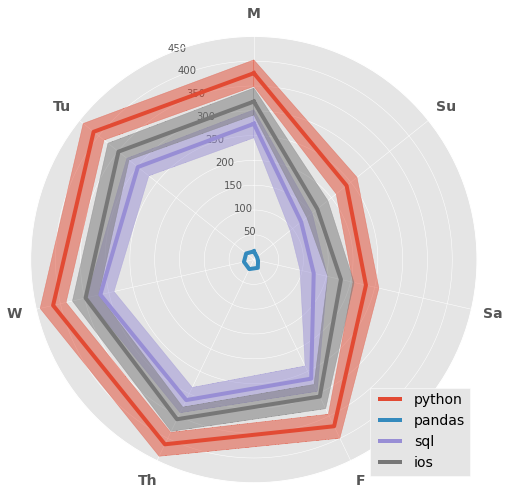

In [5]:
def plot_polar(df, error_alpha=0.5):
    """Plot DataFrame of day-of-week data as a polar plot with shaded regions
    representing S.E.M.
    
    DataFrame should be indexed 0-6 with 0=Monday, 6=Sunday
    """
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.ix[0, :])
    # convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=7, endpoint=False)
    df.index = [radians[day] for day in df.index]
    
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(loc=4, fontsize=14)


plot_polar(weekday_totals.drop(['java', 'javascript', 'c++', 'html'], axis=1))